In [76]:
import os
import pandas
from sklearn.metrics import f1_score, confusion_matrix
from autogluon.tabular import TabularPredictor, TabularDataset, FeatureMetadata
from sklearn.model_selection import train_test_split

data = pandas.read_csv(f"{os.getcwd()}/resources/reduced_data.csv")
data = data.drop(columns=['gameId', 'playId', 'nflId'])


In [52]:
new_data = []

for play in data['uniquePlayId'].unique():

    team = {}
    sub = data[data['uniquePlayId'] == play]
    form = None
    for index, row in sub.iterrows():
        team = team | {f"player_{(index+1)%11}_x": row['x'], f"player_{(index+1)%11}_y": row['y'], f"player_{(index+1)%11}_pos": row['position']}
        form = row['offenseFormation']
    new_data.append(team | {"formation": form})

new_data = pandas.DataFrame.from_dict(new_data)
print(new_data)

       player_1_x  player_1_y player_1_pos  player_2_x  player_2_y  \
0           37.94       23.86           QB       38.52       22.21   
1           34.49       24.28           QB       39.17       34.31   
2           41.74       24.19           QB       46.08        9.01   
3           53.82       30.04           QB       57.54       28.53   
4           66.33       24.01           QB       66.75       22.53   
...           ...         ...          ...         ...         ...   
15869       87.78       25.91            G       87.40       30.60   
15870       86.24       31.50            G       87.90       33.93   
15871       88.33       25.10            G       87.55       44.19   
15872       91.41       31.21            G       91.56       19.62   
15873       76.48       30.78            G       78.60       29.83   

      player_2_pos  player_3_x  player_3_y player_3_pos  player_4_x  ...  \
0                G       39.41       14.39           WR       39.17  ...   
1      

In [54]:
train, test = train_test_split(new_data, random_state=42, test_size = 0.3)

In [55]:
train_tab = TabularDataset(train)
test_tab = TabularDataset(test)

predictor = TabularPredictor(label='formation').fit(train_data=train_tab)
predictions = predictor.predict(test_tab)

No path specified. Models will be saved in: "AutogluonModels\ag-20250321_033658"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       23.87 GB / 31.59 GB (75.6%)
Disk Space Avail:   790.89 GB / 1862.12 GB (42.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'       

[1000]	valid_set's multi_error: 0.257194


	0.7482	 = Validation score   (accuracy)
	11.24s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ...
	0.7707	 = Validation score   (accuracy)
	6.0s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.6178	 = Validation score   (accuracy)
	1.2s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.6187	 = Validation score   (accuracy)
	2.16s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	0.7626	 = Validation score   (accuracy)
	1224.5s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.5926	 = Validation score   (accuracy)
	0.6s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.589	 = Validation score   (accuracy)
	0.62s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	0.8004	 = Validation score   (accuracy)
	12.34s	 = Training   runtime
	0.05s	 = Vali

In [91]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.800360,accuracy,0.049509,12.339803,0.049509,12.339803,1,True,11
1,WeightedEnsemble_L2,0.800360,accuracy,0.050509,12.421313,0.001000,0.081511,2,True,14
2,LightGBM,0.770683,accuracy,0.036003,5.996344,0.036003,5.996344,1,True,5
3,CatBoost,0.762590,accuracy,0.010000,1224.500534,0.010000,1224.500534,1,True,8
4,LightGBMXT,0.748201,accuracy,0.090260,11.237066,0.090260,11.237066,1,True,4
5,LightGBMLarge,0.716727,accuracy,0.046000,14.293546,0.046000,14.293546,1,True,13
6,NeuralNetFastAI,0.653777,accuracy,0.021513,6.323232,0.021513,6.323232,1,True,3
7,NeuralNetTorch,0.639388,accuracy,0.006999,35.585922,0.006999,35.585922,1,True,12
8,RandomForestEntr,0.618705,accuracy,0.038172,2.162368,0.038172,2.162368,1,True,7
9,RandomForestGini,0.617806,accuracy,0.038093,1.197831,0.038093,1.197831,1,True,6


In [86]:
y_true = list(test['formation'].values)
y_pred = list(predictions.values)
labels = test['formation'].unique()
print(test['formation'].unique())
f1 = f1_score(y_true, y_pred, average=None, labels=labels)
print({label:score for label,score in zip(labels, f1)})

['SHOTGUN' 'SINGLEBACK' 'EMPTY' 'I_FORM' 'PISTOL' 'JUMBO' 'WILDCAT']
{'SHOTGUN': 0.8919061893845882, 'SINGLEBACK': 0.7576136837713809, 'EMPTY': 0.719640179910045, 'I_FORM': 0.5443548387096774, 'PISTOL': 0.24193548387096775, 'JUMBO': 0.2631578947368421, 'WILDCAT': 0.0}


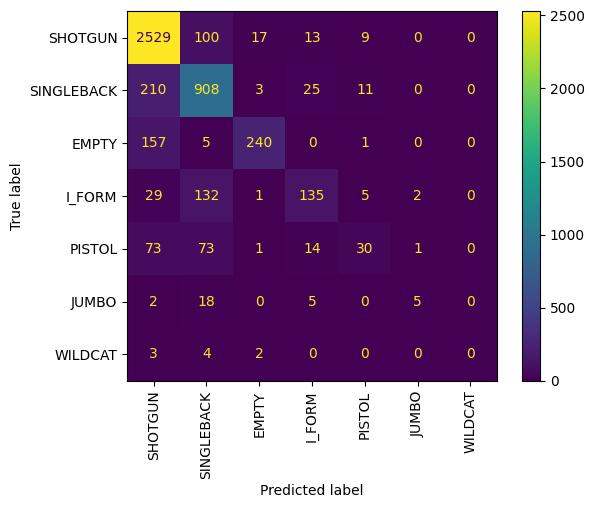

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred, labels=labels, xticks_rotation=90)